In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
# Leer el archivo de texto y guardarlo como un DataFrame de pandas
filename = "OpenBCI-RAW-2023-04-19_11-41-23.txt"
data = pd.read_csv(filename, delimiter=',')

# Los ocho canales
data1 = data.iloc[:,0].values
data2 = data.iloc[:,1].values
data3 = data.iloc[:,2].values
data4 = data.iloc[:,3].values
data5 = data.iloc[:,4].values
data6 = data.iloc[:,5].values
data7 = data.iloc[:,6].values
data8 = data.iloc[:,7].values

# Análisis en frecuencia

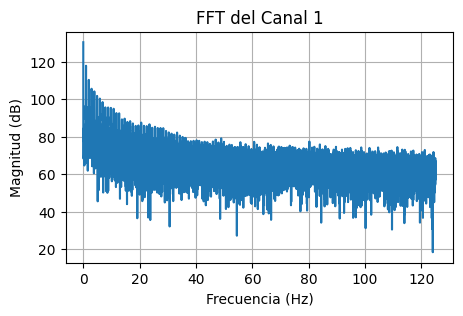

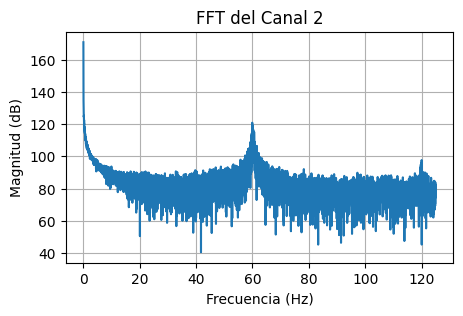

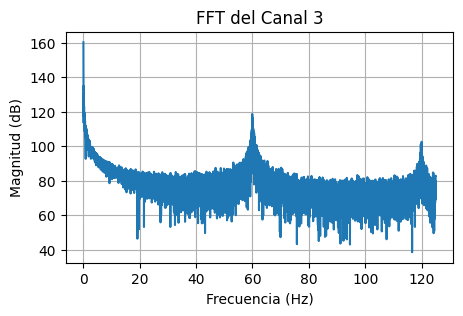

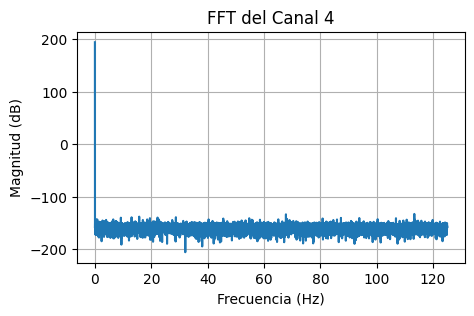

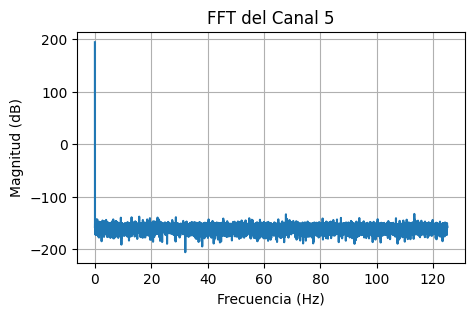

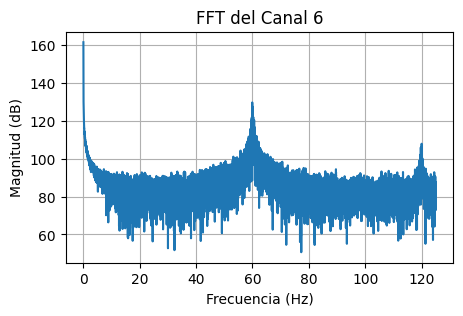

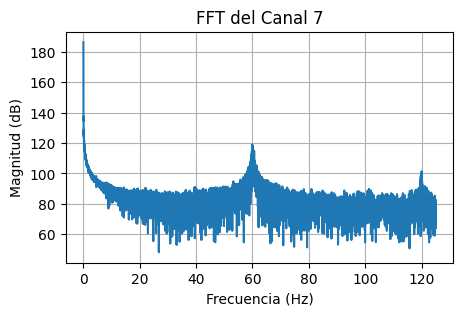

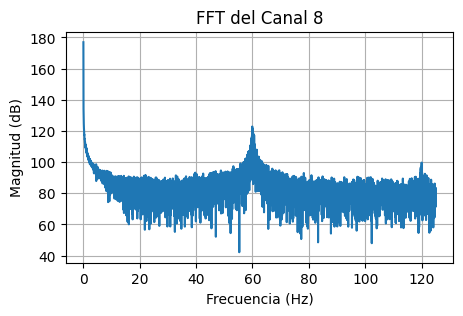

In [3]:
# Definir la frecuencia de muestreo y la cantidad de muestras
fs = 250 # Frecuencia de muestreo de la señal (en Hz)
n_samples = len(data1)

# Calcular la transformada de Fourier para cada variable
freqs = np.fft.rfftfreq(n_samples, 1/fs)
def Fourier(Data, nombre):
    fft_Data = np.abs(np.fft.rfft(Data))
    fft_data_db = 20 * np.log10(fft_Data)
    plt.figure(figsize=(5,3))
    plt.plot(freqs, fft_data_db)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.title(nombre)
    plt.grid()
    plt.show()
    
for i in range(0,8):
    name = 'FFT del Canal ' + str(i+1)
    Fourier(data.iloc[:,i].values,name)


# Filtrado de la señal

Text(0, 0.5, 'Magnitud')

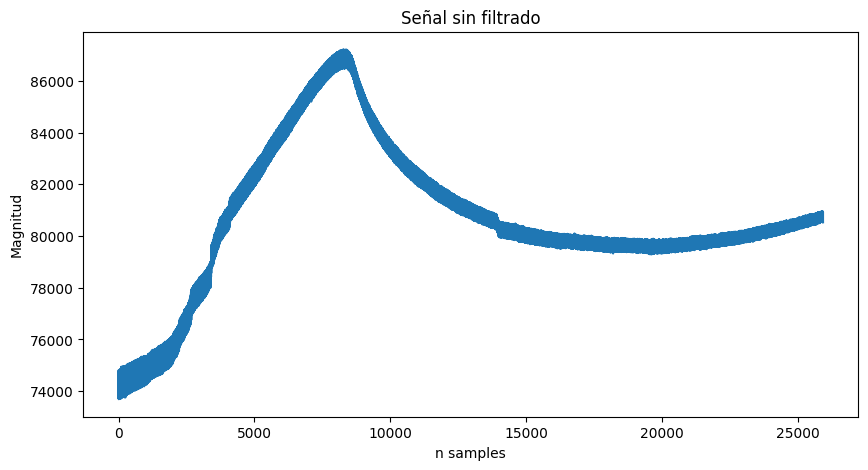

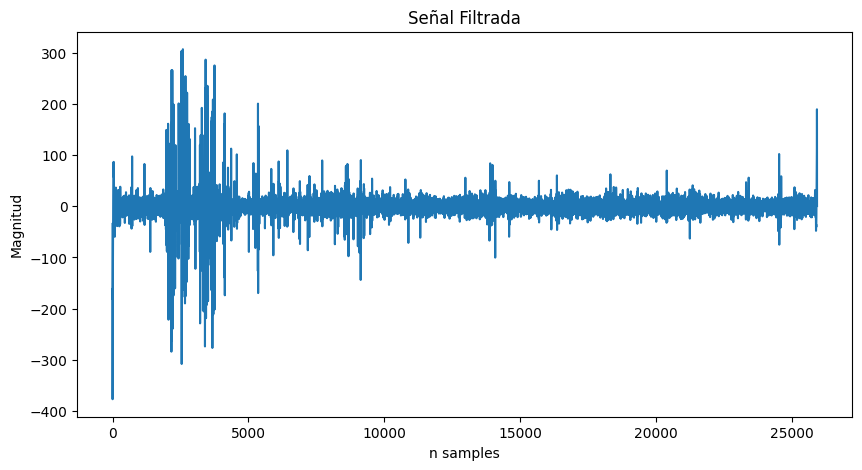

In [4]:


fs = 250 # Frecuencia de muestreo de la señal (en Hz)
lowcut = 3 # Frecuencia de corte inferior (en Hz)
highcut = 30 # Frecuencia de corte superior (en Hz)

# Calcular las frecuencias normalizadas de corte
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist

# Calcular los coeficientes del filtro Butterworth
order = 8 # Orden del filtro
b1, a1 = butter(order, [low, high], btype='band')

data_filtered = np.empty((0,len(data1)))
for i in range(0,8):
    filtered = filtfilt(b1,a1, data.iloc[:,i].values)
    data_filtered = np.vstack((data_filtered, filtered))
    
plt.figure(figsize=(10,5))
plt.plot(data7)
plt.title("Señal sin filtrado")
plt.xlabel('n samples')
plt.ylabel('Magnitud')


plt.figure(figsize=(10,5))
plt.plot(data_filtered[6])
plt.title("Señal Filtrada")
plt.xlabel('n samples')
plt.ylabel('Magnitud')


# Normalización de la señal

Text(0, 0.5, 'Magnitud')

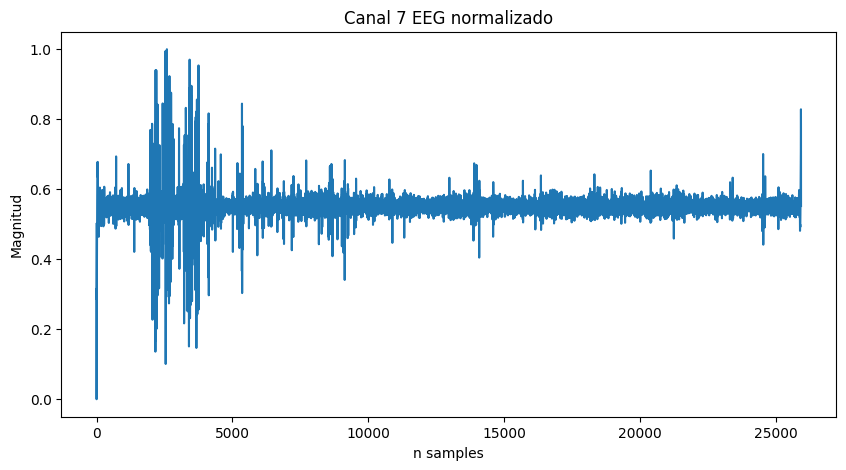

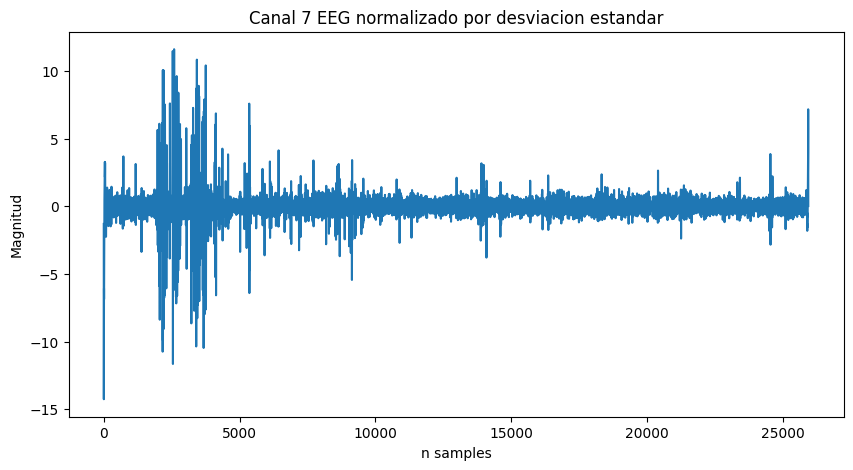

In [11]:
def Normalizacion(data_filtrada):
    mean = np.mean(data_filtrada)
    std = np.std(data_filtrada)
    min = np.min(data_filtrada)
    max = np.max(data_filtrada)

    #Normalización por amplitud máxima
    norm_max = (data_filtrada - min) / (max - min)
    #Normalización por desviación estándar
    norm_std = (data_filtrada - mean) / std
    return (norm_max,norm_std)
lista_normalizaciones = []
for i in range(0,8):
    normalizaciones = Normalizacion(data_filtered[i])
    lista_normalizaciones.append(normalizaciones)

plt.figure(figsize=(10,5))
plt.plot(lista_normalizaciones[6][0])
plt.title("Canal 7 EEG normalizado")
plt.xlabel('n samples')
plt.ylabel('Magnitud')

plt.figure(figsize=(10,5))
plt.plot(lista_normalizaciones[6][1])
plt.title("Canal 7 EEG normalizado por desviacion estandar")
plt.xlabel('n samples')
plt.ylabel('Magnitud')

# Extracción de la onda alfa

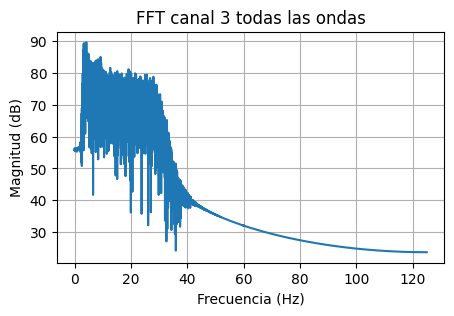

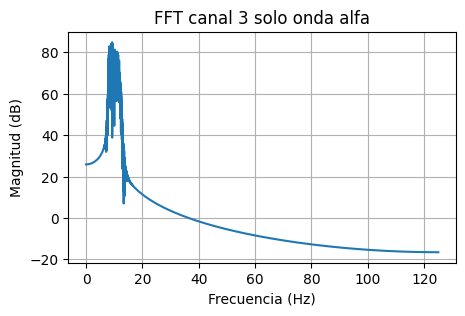

In [6]:


# Definir las frecuencias de corte del filtro
fs = 250 # Frecuencia de muestreo de la señal (en Hz)
lowcut = 8 # Frecuencia de corte inferior (en Hz)
highcut = 12 # Frecuencia de corte superior (en Hz)

# Calcular las frecuencias normalizadas de corte
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist

# Calcular los coeficientes del filtro Butterworth
order = 6 # Orden del filtro
b, a = butter(order, [low, high], btype='band')

# Aplicar el filtro en cascada a la señal de EEG
ondas_alfa = np.empty((0,len(data1)))
for i in range(0,8):
    alfa = filtfilt(b,a,data.iloc[:,i].values,axis=0)
    ondas_alfa = np.vstack((ondas_alfa,alfa))

Fourier(data_filtered[2],'FFT canal 3 todas las ondas')
Fourier(ondas_alfa[2],'FFT canal 3 solo onda alfa')


(2000.0, 4000.0)

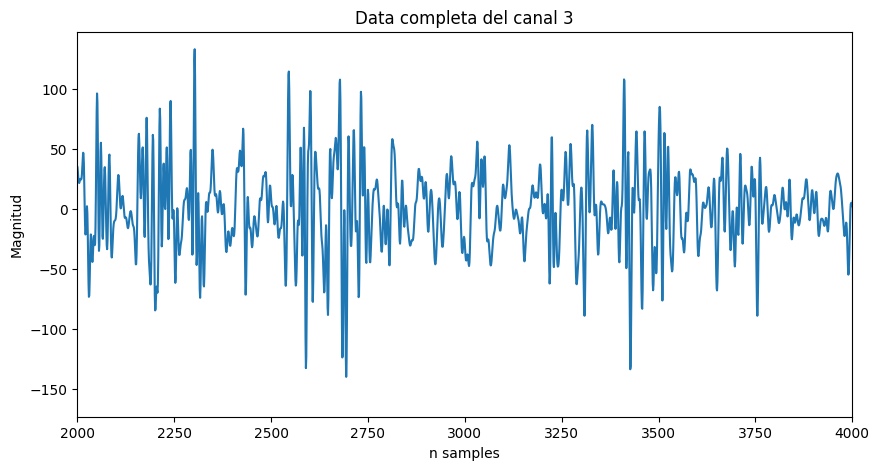

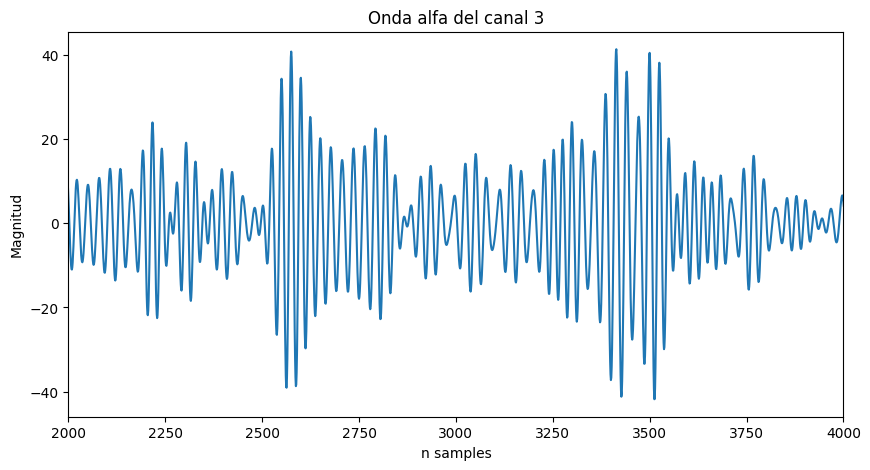

In [12]:
plt.figure(figsize=(10,5))
plt.plot(data_filtered[2])
plt.title("Data completa del canal 3")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,4000])

plt.figure(figsize=(10,5))
plt.plot(ondas_alfa[2])
plt.title("Onda alfa del canal 3")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,4000])


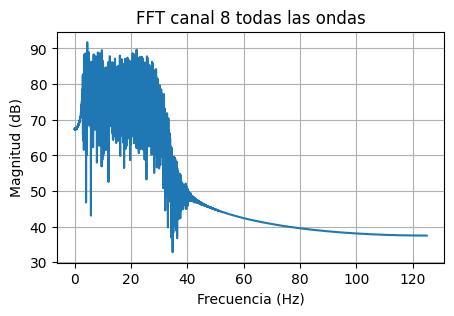

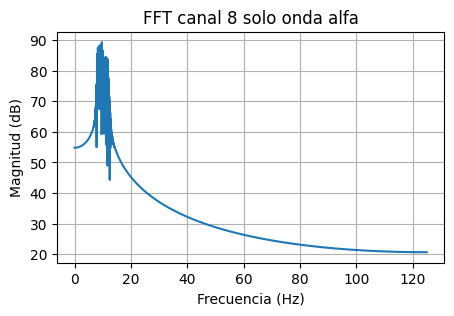

(2000.0, 4000.0)

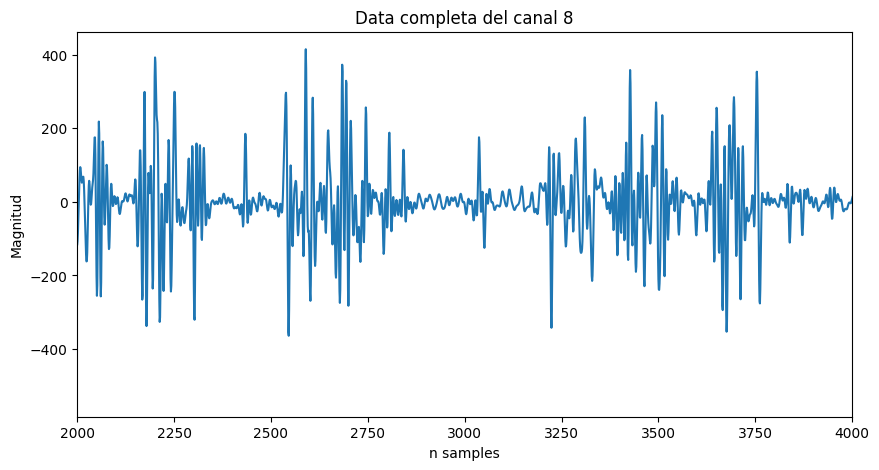

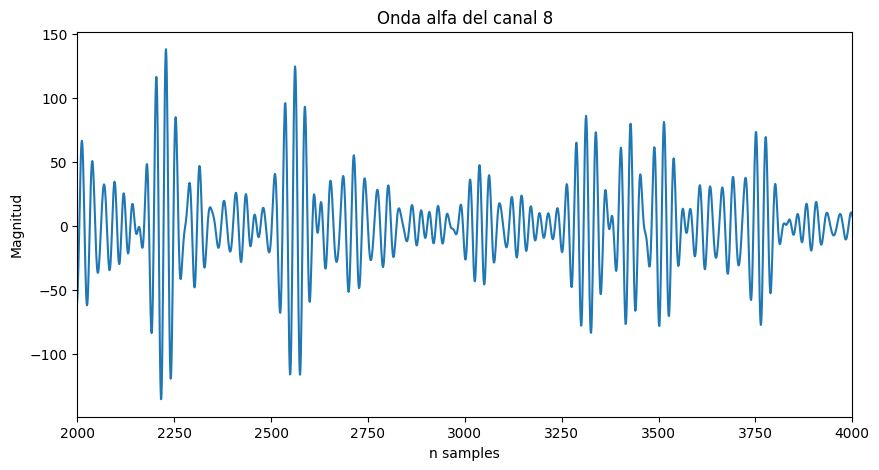

In [13]:
Fourier(data_filtered[7],'FFT canal 8 todas las ondas')
Fourier(ondas_alfa[7],'FFT canal 8 solo onda alfa')

plt.figure(figsize=(10,5))
plt.plot(data_filtered[7])
plt.title("Data completa del canal 8")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,4000])

plt.figure(figsize=(10,5))
plt.plot(ondas_alfa[7])
plt.title("Onda alfa del canal 8")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,4000])


# Extracción onda beta

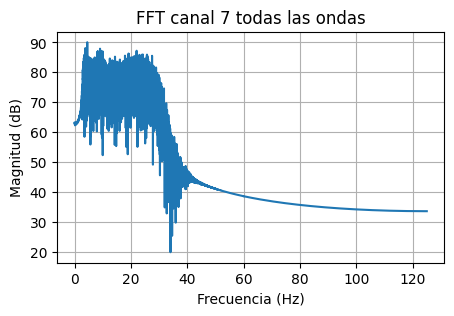

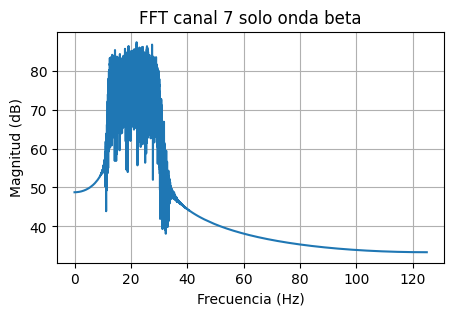

(2000.0, 3000.0)

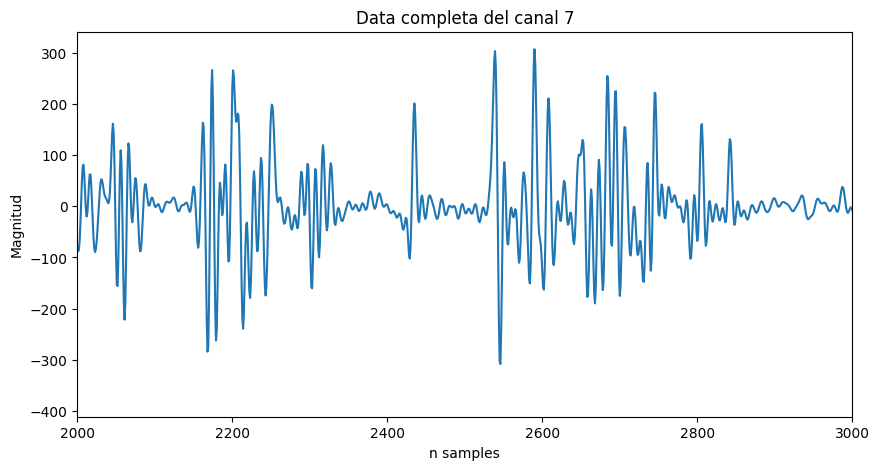

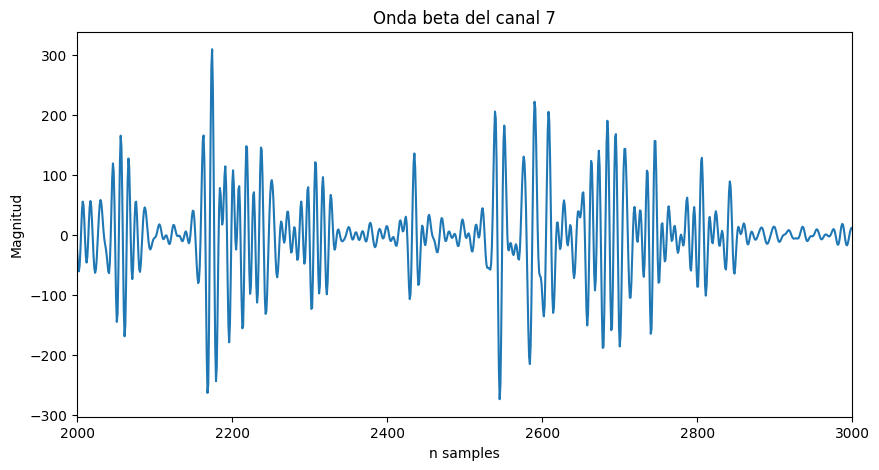

In [14]:
fs = 250 # Frecuencia de muestreo de la señal (en Hz)
lowcut = 12 # Frecuencia de corte inferior (en Hz)
highcut = 30 # Frecuencia de corte superior (en Hz)

# Calcular las frecuencias normalizadas de corte
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist

# Calcular los coeficientes del filtro Butterworth
order = 9 # Orden del filtro
b, a = butter(order, [low, high], btype='band')

# Aplicar el filtro en cascada a la señal de EEG
ondas_beta = np.empty((0,len(data1)))
for i in range(0,8):
    beta = filtfilt(b,a,data.iloc[:,i].values,axis=0)
    ondas_beta = np.vstack((ondas_beta,beta))

Fourier(data_filtered[6],'FFT canal 7 todas las ondas')
Fourier(ondas_beta[6],'FFT canal 7 solo onda beta')

plt.figure(figsize=(10,5))
plt.plot(data_filtered[6])
plt.title("Data completa del canal 7")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,3000])

plt.figure(figsize=(10,5))
plt.plot(ondas_beta[6])
plt.title("Onda beta del canal 7")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,3000])

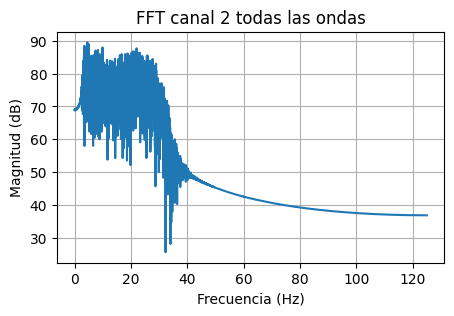

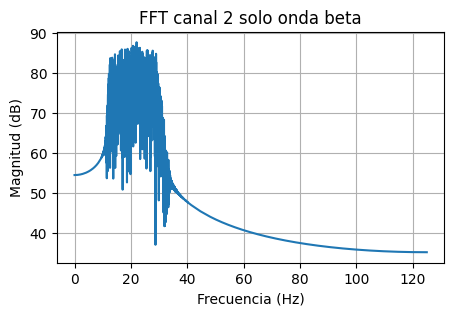

(2000.0, 3000.0)

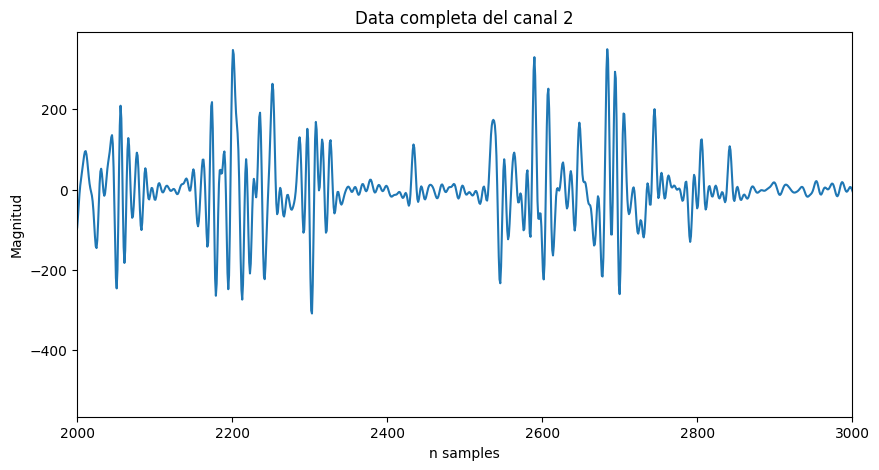

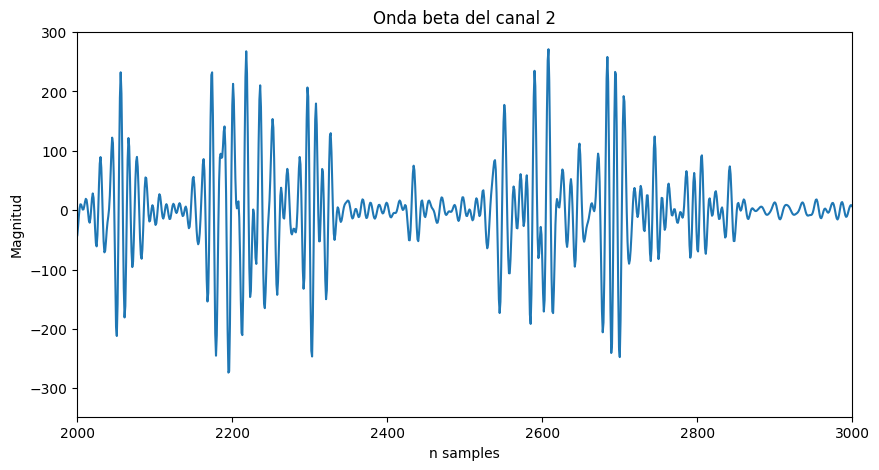

In [15]:
Fourier(data_filtered[1],'FFT canal 2 todas las ondas')
Fourier(ondas_beta[1],'FFT canal 2 solo onda beta')

plt.figure(figsize=(10,5))
plt.plot(data_filtered[1])
plt.title("Data completa del canal 2")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,3000])

plt.figure(figsize=(10,5))
plt.plot(ondas_beta[1])
plt.title("Onda beta del canal 2")
plt.xlabel('n samples')
plt.ylabel('Magnitud')
plt.xlim([2000,3000])